PROBLEM 2.1: CLASSIFY WHETHER THE EMPLOEE LEAVE THE COMPANY OR CONTINUE THE WORK IN SAME OFFICE USING LOGISTIC MODEL

In [269]:
import numpy as np

In [270]:
import pandas as pd

In [271]:
import matplotlib as plt
import matplotlib.pyplot as plt

In [272]:
import seaborn as sns

In [273]:
df1=pd.read_csv("HR_comma_sep.csv")
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [274]:
df1.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2      

In [275]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [276]:
df1.columns # these are the list of data points or input features that we have in our dataset

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [277]:
df1.shape #dataset size

(14999, 10)

In [278]:
df1.isnull() # finding null values in the dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [279]:
df1.isnull().sum() # summing all null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

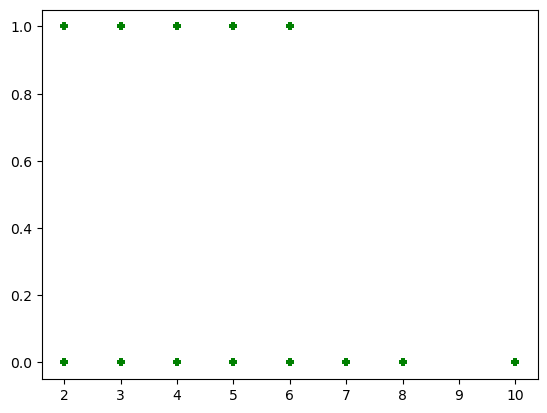

In [280]:
plt.scatter(df1.time_spend_company,df1.left,marker='+',color="green")

<Axes: xlabel='salary'>

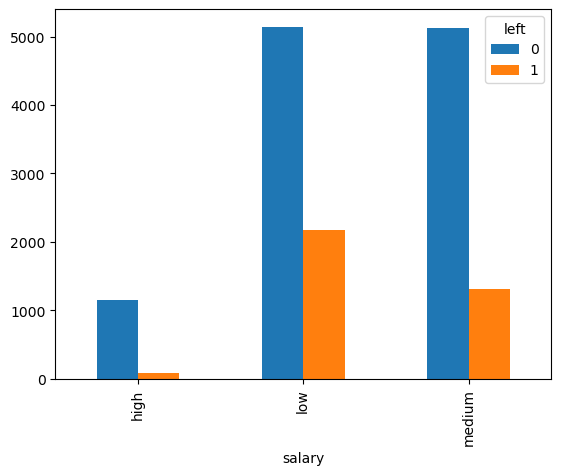

In [281]:
pd.crosstab(df1.salary,df1.left).plot(kind='bar')

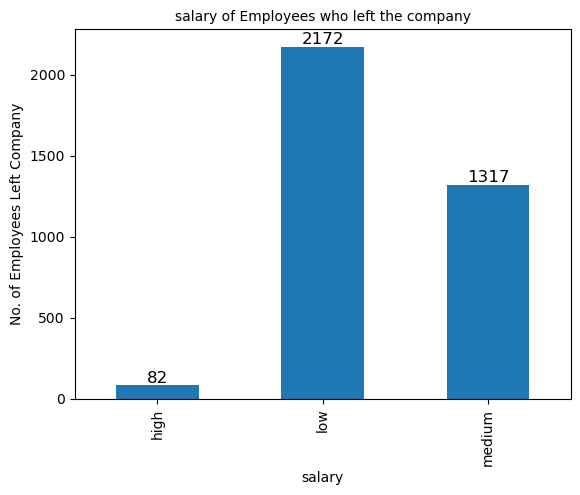

In [282]:
#plot bar chart to see salary of employees who left more in the company

ax = df1.groupby('salary')['left'].sum().plot(kind='bar')
plt.ylabel('No. of Employees Left Company',fontsize=10)
plt.xlabel('salary')
plt.title('salary of Employees who left the company', fontsize=10)
 
# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12) 
plt.show()

#report: employees who has Low salary left more

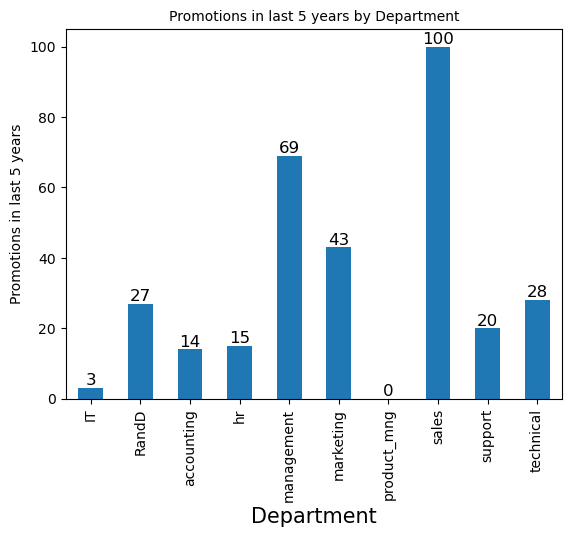

In [283]:
#plot bar chart to see promotions in last 5 years in all departments

ax = df1.groupby('Department')['promotion_last_5years'].sum().plot(kind='bar')
plt.ylabel('Promotions in last 5 years', fontsize=10)
plt.xlabel('Department', fontsize=15)
plt.title('Promotions in last 5 years by Department', fontsize=10)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()

#report: In sales department more employees are left

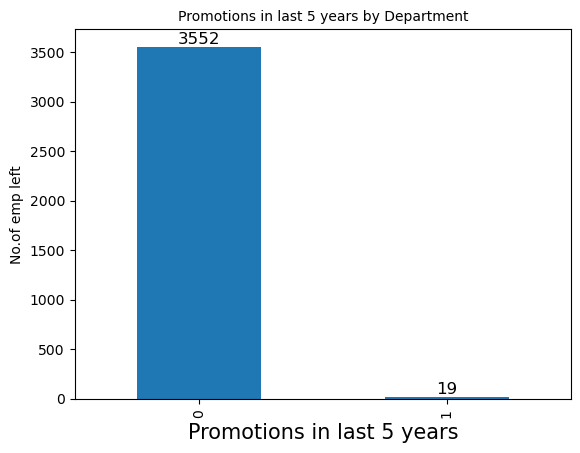

In [284]:
#plot bar chart to see promotions in last 5 years of all employees wh

ax = df1.groupby('promotion_last_5years')['left'].sum().plot(kind='bar')
plt.ylabel('No.of emp left', fontsize=10)
plt.xlabel('Promotions in last 5 years', fontsize=15)
plt.title('Promotions in last 5 years by Department', fontsize=10)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()

# report: More employees are left due to lack of promotions in the company

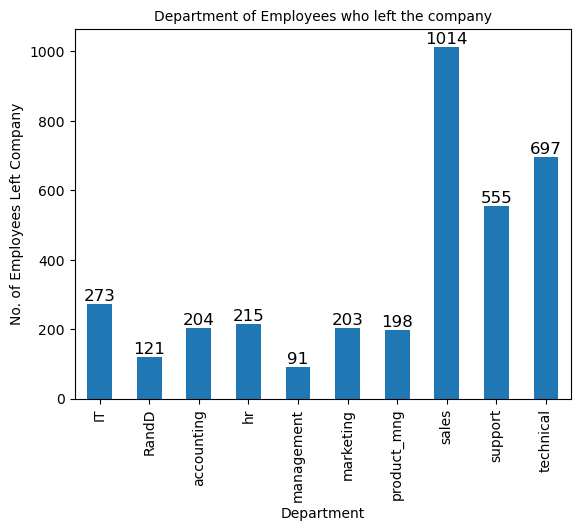

In [285]:
# Let's see in which department more employees are left

ax = df1.groupby('Department')['left'].sum().plot(kind='bar')
plt.ylabel('No. of Employees Left Company',fontsize=10)
plt.xlabel('Department')
plt.title('Department of Employees who left the company', fontsize=10)
 
# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12) 
plt.show()

# report In sales department more employees are left

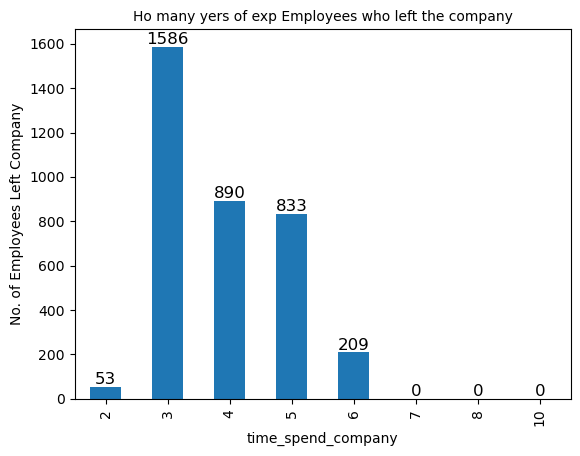

In [286]:
# Let's see how many years of experience employees are left more

ax = df1.groupby('time_spend_company')['left'].sum().plot(kind='bar')
plt.ylabel('No. of Employees Left Company',fontsize=10)
plt.xlabel('time_spend_company')
plt.title('Ho many yers of exp Employees who left the company', fontsize=10)
 
# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12) 
plt.show()

#report: 3 years experience employee are left more

NOTE NOTE NOTE....

here in this above data analysis i have found that "Promotions_last_5years", "Department" and "salary" is the main resons/factors to leave more employees from company, so i have decided to build the multiple logistic model by feeding "Promotions_last_5 years" "Department" & "salar" as input features.

NOTE NOTE NOTE...

Here in this model dependent valriable is: "left" 


Independent varaiables are: satisfaction_level,
last_evaluation,
number_project,
average_montly_hours,
time_spend_company,
Work_accident,
promotion_last_5years,
Department and 
salary      


but we are considaring only promotion_last_5years,
Department and 
salary as independent varaibles.

NOW IT IS TIME TO BUILD LOGISTIC MODEL BY FEEDING ABOVE LOADED HR_DATASET

In [432]:
#import the logistic model/ algorithm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

#Splitting the dataset into train and test

In [481]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [482]:
df2 = df1.drop(['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'],axis='columns') # 5 columns are droped

df2 #after drop unwanted columns we are assigning to another data frame df2

,left,promotion_last_5years,Department,salary
0,1,0,sales,low
1,1,0,sales,medium
2,1,0,sales,medium
3,1,0,sales,low
4,1,0,sales,low
...,...,...,...,...
11995,0,1,management,high
11996,0,1,management,high
11997,0,1,management,high
11998,0,1,marketing,high


In [483]:
df2.describe()  #statistical analysis will be possible for only numerical values only so i have do label encoding for "Department" and "salary" columns

,left,promotion_last_5years
count,11991.000000,11991.000000
mean,0.166041,0.016929
std,0.372133,0.129012
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [484]:
df2.isnull() # it returns the number of missing values(empty dells) in the dataset


,left,promotion_last_5years,Department,salary
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
11995,False,False,False,False
11996,False,False,False,False
11997,False,False,False,False
11998,False,False,False,False


In [485]:
df2.isnull().sum() # here just i am counting the all null i.e False values

left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [486]:
df2

,left,promotion_last_5years,Department,salary
0,1,0,sales,low
1,1,0,sales,medium
2,1,0,sales,medium
3,1,0,sales,low
4,1,0,sales,low
...,...,...,...,...
11995,0,1,management,high
11996,0,1,management,high
11997,0,1,management,high
11998,0,1,marketing,high


In [487]:
#drop the target variable "left"

inputs = df2.drop('left',axis='columns')

In [488]:
target = df2['left']

In [489]:
from sklearn.preprocessing import LabelEncoder
le_dept = LabelEncoder()
le_salary = LabelEncoder()

In [490]:
inputs['department_n'] = le_dept.fit_transform(inputs['Department'])
inputs['salary_n'] = le_salary.fit_transform(inputs['salary'])

In [491]:
inputs

,promotion_last_5years,Department,salary,department_n,salary_n
0,0,sales,low,7,1
1,0,sales,medium,7,2
2,0,sales,medium,7,2
3,0,sales,low,7,1
4,0,sales,low,7,1
...,...,...,...,...,...
11995,1,management,high,4,0
11996,1,management,high,4,0
11997,1,management,high,4,0
11998,1,marketing,high,5,0


In [492]:
inputs_n = inputs.drop(['Department','salary'],axis='columns')
inputs_n

,promotion_last_5years,department_n,salary_n
0,0,7,1
1,0,7,2
2,0,7,2
3,0,7,1
4,0,7,1
...,...,...,...
11995,1,4,0
11996,1,4,0
11997,1,4,0
11998,1,5,0


In [493]:
target # this is our target input variable 

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [495]:
# model.score(x_test,y_test) # we gor 80

In [496]:
y_predicted

array([1, 0, 0, ..., 0, 0, 0])

model.coef_ indicates value of m in y=m*x + b equation

In [497]:
model.coef_

array([[-1.32110321,  0.02053329,  0.03913565]])

model.intercept_ indicates value of b in y=m*x + b equation

In [498]:
model.intercept_

array([-1.77860325])

***** NOTE ****

Lets defined sigmoid function now and do the math with hand

HERE WE ARE TESTING THE LOGISTIC MODEL BY FEEDING SINGLE INPUT VARAIABLE WHICH IS EITHER "SALARY" / "DEPT" /  "promotion_last_5years"

In [499]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [500]:
df5.columns

Index(['left', 'promotion_last_5years', 'Department', 'salary'], dtype='object')

In [501]:
def prediction_function(salary):
    z = 0.042 * salary - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [502]:
salary = 1 #low
prediction_function(salary)

0.18422210625703123

In [503]:
salary = 2
prediction_function(salary) #ok

0.19061793336885566

In [504]:
salary = 3
prediction_function(salary) #ok

0.1971821390017604

HERE WE ARE TESTING THE LOGISTIC MODEL BY FEEDING ** MULTI VARAIABLE INPUTS *** WHICH IS EITHER "SALARY" & "DEPT" &  "promotion_last_5years"

In [518]:
inputs_n # these are the list of mutiple input features i am using to fit logistic model

,promotion_last_5years,department_n,salary_n
0,0,7,1
1,0,7,2
2,0,7,2
3,0,7,1
4,0,7,1
...,...,...,...
11995,1,4,0
11996,1,4,0
11997,1,4,0
11998,1,5,0


In [520]:
target # this is our target output variable to buid logistic model

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [521]:
model.fit(inputs_n, target)

LogisticRegression()

In [524]:
model.score(inputs_n,target) # finding multi variable logistic model score

0.8339588024351597

In [526]:
model.predict([[0,2,9]]) # testing the muti variable logistic model

/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [527]:
model.predict([[0,7,1]])

/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [537]:
model.predict([[1,6,3]])

/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [533]:
# y_pred = model.predict(X_test)


In [540]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8324
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2995
           1       0.00      0.00      0.00       603

    accuracy                           0.83      3598
   macro avg       0.42      0.50      0.45      3598
weighted avg       0.69      0.83      0.76      3598



/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo